# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [24]:
states_edu = pd.read_csv("/Users/emess/MDST/MDST-Tutorial-main/data/states_edu.csv")
states_edu.shape
states_edu.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

TypeError: 'Index' object is not callable

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [ ]:
states_edu["YEAR"].nunique()

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [16]:
outcome_scores = ["AVG_MATH_4_SCORE", "AVG_MATH_8_SCORE", "AVG_READING_4_SCORE", "AVG_READING_8_SCORE"]

ohio = states_edu[states_edu["STATE"] == "OHIO"]
michigan = states_edu[states_edu["STATE"] == "MICHIGAN"]
print(michigan[["AVG_MATH_4_SCORE", "AVG_MATH_8_SCORE", "AVG_READING_4_SCORE", "AVG_READING_8_SCORE"]].mean())
print(ohio[["AVG_MATH_4_SCORE", "AVG_MATH_8_SCORE", "AVG_READING_4_SCORE", "AVG_READING_8_SCORE"]].mean())

#ohio one 

AVG_MATH_4_SCORE       234.363636
AVG_MATH_8_SCORE       276.166667
AVG_READING_4_SCORE    217.833333
AVG_READING_8_SCORE    263.500000
dtype: float64
AVG_MATH_4_SCORE       239.454545
AVG_MATH_8_SCORE       282.250000
AVG_READING_4_SCORE    223.181818
AVG_READING_8_SCORE    267.700000
dtype: float64


Find the average for your outcome score across all states in 2019

In [18]:
twenty_nineteen = states_edu[states_edu["YEAR"] == 2019]
twenty_nineteen[outcome_scores].mean()

AVG_MATH_4_SCORE       239.943396
AVG_MATH_8_SCORE       281.264151
AVG_READING_4_SCORE    219.792453
AVG_READING_8_SCORE    262.566038
dtype: float64

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [20]:
by_states = states_edu.groupby("STATE")
by_states[outcome_scores].max()

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
STATE,,,,
ALABAMA,233.0,269.0,220.0,259.0
ALASKA,237.0,283.0,214.0,261.0
ARIZONA,240.0,283.0,216.0,263.0
ARKANSAS,240.0,279.0,219.0,262.0
CALIFORNIA,235.0,277.0,216.0,263.0
COLORADO,247.0,292.0,227.0,271.0
CONNECTICUT,245.0,289.0,230.0,275.0
DELAWARE,243.0,284.0,226.0,267.0
DISTRICT_OF_COLUMBIA,235.0,269.0,214.0,250.0


<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [31]:
print(states_edu.columns)
states_edu["INSTRUCTION_EXPENDITURE_percent"] = states_edu["INSTRUCTION_EXPENDITURE"] / states_edu["TOTAL_EXPENDITURE"]
states_edu["SUPPORT_SERVICES_EXPENDITURE_percent"] = states_edu["SUPPORT_SERVICES_EXPENDITURE"] / states_edu["TOTAL_EXPENDITURE"]
states_edu["CAPITAL_OUTLAY_EXPENDITURE_percent"] = states_edu["CAPITAL_OUTLAY_EXPENDITURE"] / states_edu["TOTAL_EXPENDITURE"]
states_edu["OTHER_EXPENDITURE_percent"] = states_edu["OTHER_EXPENDITURE"] / states_edu["TOTAL_EXPENDITURE"]

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE', 'rev_per_student',
       'state_funding_percap'],
      dtype='object')


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

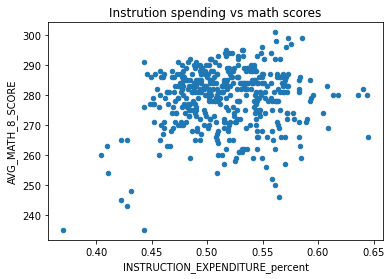

In [37]:
states_edu.plot.scatter(x="INSTRUCTION_EXPENDITURE_percent", y="AVG_MATH_8_SCORE", title="Instrution spending vs math scores")

**<CAPTION FOR VIZ 1>**

**Visualization 2**

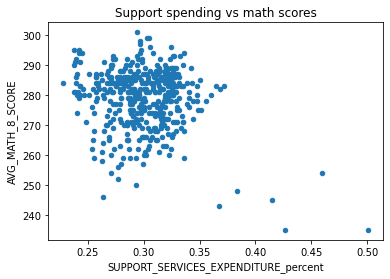

In [38]:
states_edu.plot.scatter(x="SUPPORT_SERVICES_EXPENDITURE_percent", y="AVG_MATH_8_SCORE", title="Support spending vs math scores")

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [48]:
from sklearn.model_selection import train_test_split

In [73]:
subset = states_edu[['SUPPORT_SERVICES_EXPENDITURE_percent','INSTRUCTION_EXPENDITURE_percent','CAPITAL_OUTLAY_EXPENDITURE_percent','AVG_MATH_8_SCORE']].dropna()
print(subset.isna().sum().sum())




X = subset[['SUPPORT_SERVICES_EXPENDITURE_percent','INSTRUCTION_EXPENDITURE_percent','CAPITAL_OUTLAY_EXPENDITURE_percent']]
y = subset.loc[X.index]['AVG_MATH_8_SCORE']

y = y.dropna()
print(X.shape)
y.shape

print(X.describe())
y.describe()


0
(439, 3)
       SUPPORT_SERVICES_EXPENDITURE_percent  INSTRUCTION_EXPENDITURE_percent  \
count                            439.000000                       439.000000   
mean                               0.299179                         0.517147   
std                                0.031044                         0.040660   
min                                0.228211                         0.370584   
25%                                0.279458                         0.488937   
50%                                0.298721                         0.515648   
75%                                0.319095                         0.545378   
max                                0.500568                         0.644874   

       CAPITAL_OUTLAY_EXPENDITURE_percent  
count                          439.000000  
mean                             0.095037  
std                              0.040597  
min                              0.009717  
25%                              0.068237  
50% 

count    439.000000
mean     278.676538
std       10.086166
min      235.000000
25%      273.000000
50%      281.000000
75%      286.000000
max      301.000000
Name: AVG_MATH_8_SCORE, dtype: float64

In [74]:
 X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= .3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [75]:
# import your sklearn class here
from sklearn.neighbors import KNeighborsClassifier

In [126]:
# create your model here
model = KNeighborsClassifier(n_neighbors=2)

In [127]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [128]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [129]:
np.mean(model.predict(X_test)-y_test)

-1.8106060606060606

In [130]:
model.score(X_test, y_test)

0.08333333333333333

In [131]:
np.mean(np.abs(model.predict(X_test)-y_test))

9.098484848484848

In [132]:
np.mean((model.predict(X_test)-y_test)**2)**0.5

12.838448409981542

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

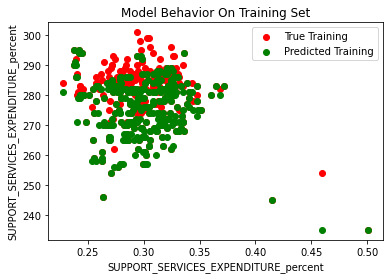

In [133]:
col_name = 'SUPPORT_SERVICES_EXPENDITURE_percent'

plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('SUPPORT_SERVICES_EXPENDITURE_percent')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

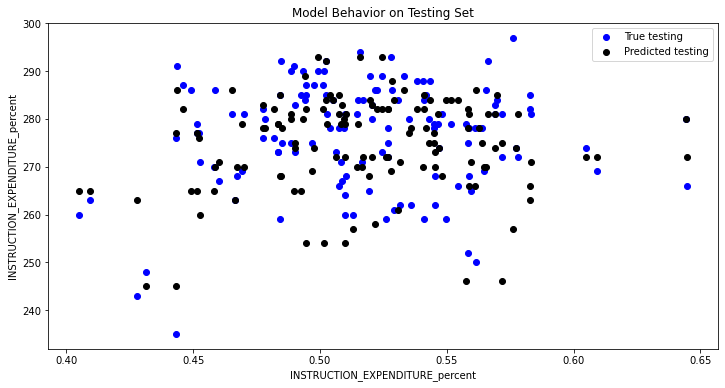

In [135]:
col_name = "INSTRUCTION_EXPENDITURE_percent"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('INSTRUCTION_EXPENDITURE_percent')
plt.title("Model Behavior on Testing Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

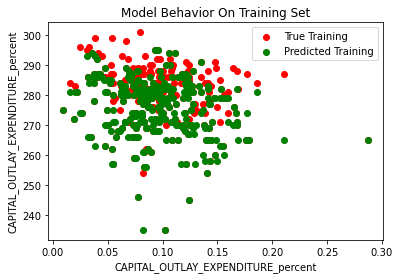

In [136]:
col_name = 'CAPITAL_OUTLAY_EXPENDITURE_percent'

plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('CAPITAL_OUTLAY_EXPENDITURE_percent')
plt.title("Model Behavior On Training Set")

<h2> Summary </h2>

I looked at the way that the way that different state spend their money would change the math grade 8 scores. The spending was in three categories supprt, instruction and capital outlays. To make the comparisions possible I divided by the total expendiure to get the percent spent on each category. The I used K nearest neighbors to see if this could expain the difference in math scores between years and states. using k = 2 the optimal number of K I only found an R^2 of .08. This is pretty low and there may not have been enough data for there to do KNN with 3 dimnesions of predictors. The plots don't look terrible though. 